In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.optimize import fminbound
import scipy.optimize as opt
import scipy 

# to print plots inline
%matplotlib inline

Paramters \
$\beta = 0.95 $  time preference \
$\alpha = 0.50 $  This measures the intensity of habit formation and also denotes the nonseparability of preferences over time \
R = 1  interest rate \
y = 100 exogenous income

In [9]:
beta = 0.95
alpha = 0.05
R = 1
Y = 100

In [12]:
'''
------------------------------------------------------------------------
Create Grid for State Space    
------------------------------------------------------------------------
lb_w      = scalar, lower bound of cake grid
ub_w      = scalar, upper bound of cake grid 
size_w    = integer, number of grid points in cake state space
w_grid    = vector, size_w x 1 vector of cake grid points 
------------------------------------------------------------------------
'''
lb_a = 0.4 
ub_a = 2.0 
size_c = 200 #number of grid points 
size_a = 200
c_grid = np.linspace(lb_a, ub_a, size_c)
a_grid = np.linspace(lb_a, ub_a, size_a)

In [4]:
def utility(a, aprime, alpha, R, Y):
    """
    Per period utility function
    """
    c = Y + (1 + R) * a - aprime
    
    U = np.log(c - alpha * c_1)
    
    return U 

In [13]:
# write Bellman operator function to help with VFI
def bellman_operator(V, a_grid, params):
    '''
    The approximate Bellman operator, which computes and returns the
    updated value function TV on the grid points.  An array to store
    the new set of values TV is optionally supplied (to avoid having to
    allocate new arrays at each iteration).  If supplied, any existing data in 
    Tw will be overwritten.
    '''
    beta, Y, R, alpha = params
    
    # Apply cubic interpolation to V
    V_func = scipy.interpolate.interp1d(a_grid, V, kind='cubic', fill_value='extrapolate')

    # Initialize array for operator and policy function
    TV = np.empty_like(V)
    opt_a = np.empty_like(TV)

    # == set TV[i] = max_c { u(c,c_1) + beta V(Y + (1+r)A - c, c)} == #
    for i, a in enumerate(a_grid):
        def objective(a_prime):
            return - utility(a, aprime, alpha, R, Y) - beta * V_func(a_prime)
        a_star = fminbound(objective, 1e-6, a - 1e-6)
        opta[i] = a_star
        TV[i] = - objective(a_star)
    return TV, opta

In [14]:
VFtol = 1e-5
VFdist = 7.0 
VFmaxiter = 5000 
V = np.zeros(size_a) #true_VF # initial guess at value function
Vstore = np.zeros((size_a, VFmaxiter)) #initialize Vstore array
VFiter = 1 
V_params = (beta, Y, R, alpha)
while VFdist > VFtol and VFiter < VFmaxiter:
    Vstore[:, VFiter] = V
    TV, opta = bellman_operator(V, a_grid, V_params)
    VFdist = (np.absolute(V - TV)).max()  # check distance
    print('Iteration ', VFiter, ', distance = ', VFdist)
    V = TV
    VFiter += 1

if VFiter < VFmaxiter:
    print('Value function converged after this many iterations:', VFiter)
else:
    print('Value function did not converge')            


VF = V # solution to the functional equation

NameError: name 'aprime' is not defined

# Extract decision rules from solution 

In [7]:
'''
------------------------------------------------------------------------
Find consumption and savings policy functions   
------------------------|------------------------------------------------
optC  = vector, the optimal choice of c for each c
------------------------------------------------------------------------
'''
opt_a = Y + (1 + R) * a - opt_c

# Visualise Output

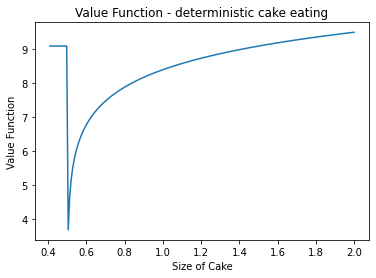

In [8]:
# Plot value function 
plt.figure()
plt.plot(c_grid[1:], VF[1:])
plt.xlabel('Size of Cake')
plt.ylabel('Value Function')
plt.title('Value Function - deterministic cake eating')
plt.show()